In [1]:
from tensorflow.keras.layers import * 
from tensorflow.keras.models import Sequential 
import matplotlib.pyplot as plt
import numpy as np

In [17]:
def preprocess_data(X,Y):
    h,w = X[0].shape
    half_w = w//2
    half_h = h//2 
    X_Temp = np.ones((X.shape[0]*4, half_h, half_w))
    Y_Temp = np.ones((X.shape[0]*4))
    index = 0 
    for j in range(0,X.shape[0]):
        x_img = X[j]
        X_Temp[index] = x_img[:half_h,:half_w]
        Y_Temp[index] = Y[j]
        index += 1
    
    for j in range(0,X.shape[0]):
        x_img = X[j]
        X_Temp[index] = x_img[half_h:,:half_w]
        Y_Temp[index] = Y[j]
        index += 1
    
    for j in range(0,X.shape[0]):
        x_img = X[j]
        X_Temp[index] = x_img[:half_h,half_w:]
        Y_Temp[index] = Y[j]
        index += 1

    for j in range(0,X.shape[0]):
        x_img = X[j]
        X_Temp[index] = x_img[half_h:,half_w:]
        Y_Temp[index] = Y[j]
        index += 1
        
    X_Temp = X_Temp.reshape((-1,14,14,1))
    X_Temp = X_Temp/255.0
    Y_Temp = to_categorical(Y_Temp)
    
    return X_Temp, Y_Temp

In [18]:
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.utils import to_categorical

In [19]:
(XTrain, YTrain),(XTest, YTest) = mnist.load_data()

In [20]:
XTrain.shape,YTrain.shape,XTest.shape,YTest.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [21]:
XTrain, YTrain = preprocess_data(XTrain,YTrain)
XTest, YTest = preprocess_data(XTest,YTest)

In [22]:
XTrain.shape, XTest.shape, YTrain.shape, YTest.shape

((240000, 14, 14, 1), (40000, 14, 14, 1), (240000, 10), (40000, 10))

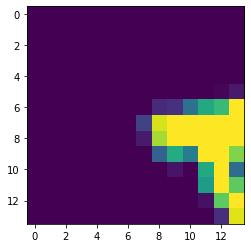

In [23]:
plt.imshow(XTrain[0])
plt.show()

In [32]:
model = Sequential()
#add model layers
model.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(14,14,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPool2D((1,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10, activation='softmax'))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 12, 12, 128)       1280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 64)          73792     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 2, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

In [34]:
from tensorflow.keras.optimizers import RMSprop

In [35]:
rms = RMSprop(learning_rate=0.001)
model.compile(optimizer=rms, loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
hist = model.fit(XTrain,YTrain,epochs=20,validation_split=0.1,batch_size=256)

Epoch 1/20
844/844 [==============================] - 32s 37ms/step - loss: 1.0101 - accuracy: 0.6408 - val_loss: 0.8833 - val_accuracy: 0.6818
Epoch 2/20
844/844 [==============================] - 31s 37ms/step - loss: 0.6744 - accuracy: 0.7610 - val_loss: 0.7549 - val_accuracy: 0.7228
Epoch 3/20
844/844 [==============================] - 31s 37ms/step - loss: 0.6038 - accuracy: 0.7851 - val_loss: 0.7067 - val_accuracy: 0.7438
Epoch 4/20
844/844 [==============================] - 32s 38ms/step - loss: 0.5644 - accuracy: 0.7989 - val_loss: 0.6526 - val_accuracy: 0.7577
Epoch 5/20
844/844 [==============================] - 31s 37ms/step - loss: 0.5387 - accuracy: 0.8074 - val_loss: 0.6769 - val_accuracy: 0.7511
Epoch 6/20
844/844 [==============================] - 31s 36ms/step - loss: 0.5172 - accuracy: 0.8140 - val_loss: 0.6467 - val_accuracy: 0.7650
Epoch 7/20
844/844 [==============================] - 31s 37ms/step - loss: 0.5015 - accuracy: 0.8192 - val_loss: 0.6394 - val_accuracy:

In [37]:
model.evaluate(XTest,YTest)

1250/1250 [==============================] - 4s 3ms/step - loss: 0.5276 - accuracy: 0.8185


[0.5275982618331909, 0.8184999823570251]

In [38]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

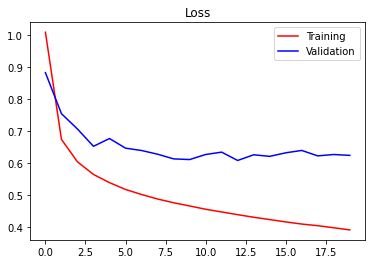

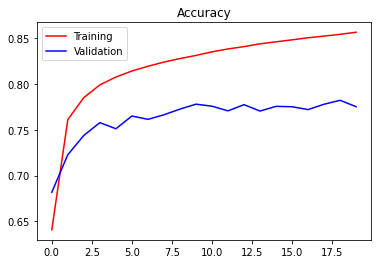

In [39]:
plt.figure(0)
plt.title("Loss")
plt.plot(hist.history['loss'], 'r', label='Training')
plt.plot(hist.history['val_loss'], 'b', label='Validation')
plt.legend()
plt.show()

plt.figure(1)
plt.title("Accuracy")
plt.plot(hist.history['accuracy'], 'r', label='Training')
plt.plot(hist.history['val_accuracy'], 'b', label='Validation')
plt.legend()
plt.show()

In [40]:
model.save("rmsprop_model.h5")

ValueError: in user code:

    C:\Users\ruthv\anaconda3\lib\site-packages\keras\engine\training.py:1586 predict_function  *
        return step_function(self, iterator)
    C:\Users\ruthv\anaconda3\lib\site-packages\keras\engine\training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\ruthv\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\ruthv\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\ruthv\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\ruthv\anaconda3\lib\site-packages\keras\engine\training.py:1569 run_step  **
        outputs = model.predict_step(data)
    C:\Users\ruthv\anaconda3\lib\site-packages\keras\engine\training.py:1537 predict_step
        return self(x, training=False)
    C:\Users\ruthv\anaconda3\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\ruthv\anaconda3\lib\site-packages\keras\engine\input_spec.py:229 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (1, 14, 1)
